In [1]:
import pandas as pd
from mplsoccer import Pitch
from mplsoccer import VerticalPitch
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

In [2]:
data = pd.read_csv("Data/Navy/navyShots.csv").reset_index()
data.dropna(inplace=True)

In [3]:
data.dropna(inplace=True)
startX = []
startY = []
endX = []
endY = []
for i in range(data.shape[0]):
    row = data.iloc[i]
    startX.append(float(row.get("Start Pos").split(", ")[0][1:]))
    startY.append(float(row.get("Start Pos").split(", ")[1][:-1]))
    endX.append(float(row.get("End Pos").split(", ")[0][1:]))
    endY.append(float(row.get("End Pos").split(", ")[1][:-1]))
data = data.assign(startX = startX)
data =data.assign(startY = startY)
data =data.assign(endX = endX)
data =data.assign(endY = endY)
oppSide = dict()
for i in data.get("numOpportunity").unique():
    df = data[data.get("numOpportunity")==i]
    endX = df.iloc[-1].get("endX")
    if endX >60:
        side = "right"
    elif endX<=60:
        side = "left"
    oppSide[i]=side
data = data.assign(Side = data.get("numOpportunity").apply(lambda num:oppSide[num]))
rightOpportunities = data[data.get("Side") == "right"]
rightOpportunities = rightOpportunities.assign(startX = 120-rightOpportunities.get("startX"))
rightOpportunities = rightOpportunities.assign(startY = 80-rightOpportunities.get("startY"))
rightOpportunities = rightOpportunities.assign(endX = 120-rightOpportunities.get("endX"))
rightOpportunities = rightOpportunities.assign(endY = 80-rightOpportunities.get("endY"))
leftOpportunities = data[data.get("Side") == "left"]
opportunities = pd.merge(rightOpportunities, leftOpportunities,how = "outer")
opportunities.to_csv("Shots/NavyOrigins.csv",index = False)

Text(0.5, 1.0, 'Heat Map of Opportunities Conceded With Buildup')

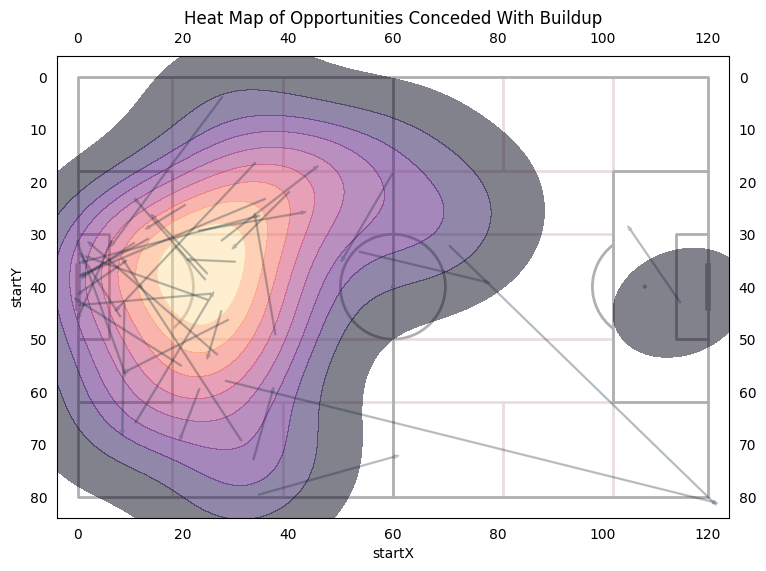

In [21]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=opportunities.get("startX"),y=opportunities.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(opportunities.shape[0]):
    row = opportunities.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .2)
plt.title("Heat Map of Opportunities Conceded With Buildup")

In [22]:
origins =[]
for i in range(int(opportunities.get("numOpportunity").max())+1):
    limited = opportunities[opportunities.get("numOpportunity") == i].iloc[0]
    origins.append(limited)
origins = pd.DataFrame(origins)

In [23]:
origins

,index,Game,numOpportunity,Event,Result,Start Pos,End Pos,Team,Player,startX,startY,endX,endY,Side
0,1,Navy,0.0,2nd Ball,Successful,"[91.9047619047619, 22.095238095238102]","[-1, -1]",Navy,2.0,28.095238,57.904762,121.000000,81.000000,right
3,7,Navy,1.0,2nd Ball,Successful,"[49.23809523809522, 47.80952380952381]","[-1, -1]",Navy,23.0,70.761905,32.190476,121.000000,81.000000,right
6,13,Navy,2.0,Set Piece,Successful,"[88.85714285714283, 10.666666666666671]","[111.14285714285714, 44.76190476190476]",Navy,23.0,31.142857,69.333333,8.857143,35.238095,right
8,17,Navy,3.0,2nd Ball,Successful,"[66.38095238095238, 46.666666666666664]","[42.38095238095237, 40.952380952380956]",Navy,19.0,53.619048,33.333333,77.619048,39.047619,right
11,23,Navy,4.0,2nd Ball,Successful,"[8.857142857142847, 43.23809523809524]","[8.476190476190467, 67.42857142857143]",Navy,2.0,8.857143,43.238095,8.476190,67.428571,left
14,29,Navy,5.0,Pass,Unsuccessful,"[22.952380952380942, 29.33333333333333]","[42.57142857142856, 25.904761904761912]",UCSD,6.0,22.952381,29.333333,42.571429,25.904762,left
17,35,Navy,6.0,Tackle,Successful,"[38.38095238095237, 19.42857142857143]","[-1, -1]",Navy,31.0,38.380952,19.428571,-1.000000,-1.000000,left
19,39,Navy,7.0,Tackle,Successful,"[52.66666666666665, 15.80952380952381]","[-1, -1]",Navy,11.0,52.666667,15.809524,-1.000000,-1.000000,left
22,45,Navy,8.0,Pass,Successful,"[114.76190476190476, 43.04761904761905]","[105.23809523809524, 29.14285714285714]",Navy,11.0,114.761905,43.047619,105.238095,29.142857,left
25,51,Navy,9.0,Throw-in,Unsuccessful,"[34.38095238095237, 79.61904761904762]","[60.28571428571427, 72.38095238095238]",UCSD,12.0,34.380952,79.619048,60.285714,72.380952,left


Text(0.5, 1.0, 'Opponent Shots Origin')

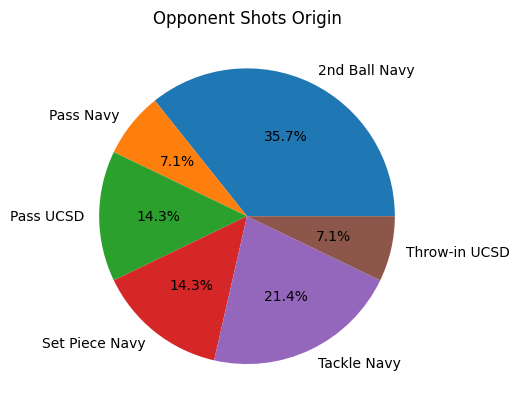

In [24]:
originCounts = origins.groupby(["Event","Team"]).count().reset_index()
labels = originCounts.get("Event") + " "+originCounts.get("Team")
plt.pie(originCounts.get("index"),labels = labels,autopct='%1.1f%%')
plt.title("Opponent Shots Origin")

In [25]:
origins[origins.get("Event")=="Set Piece"].shape[0]

2

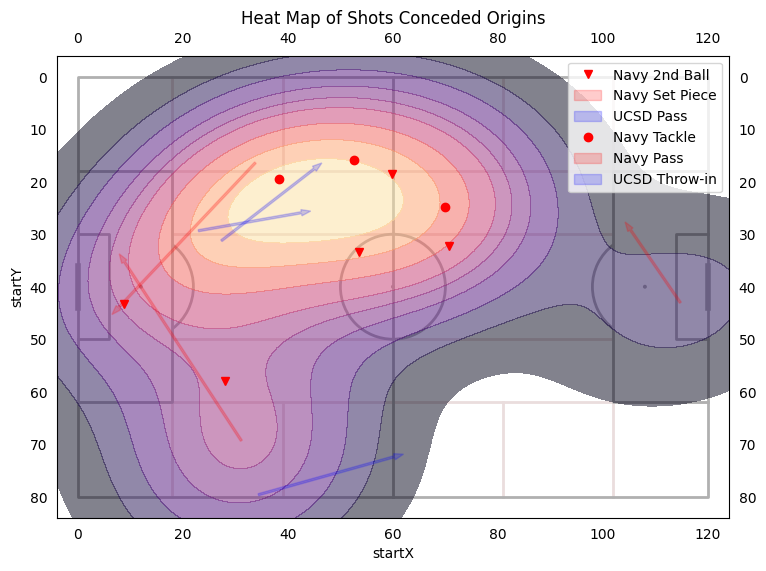

In [31]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=origins.get("startX"),y=origins.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")

for i in range(origins.shape[0]):
    row = origins.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="2nd Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .4,alpha = .2,color =color,label = team+ " "+row.get("Event"))
plt.title("Heat Map of Shots Conceded Origins")
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())


14

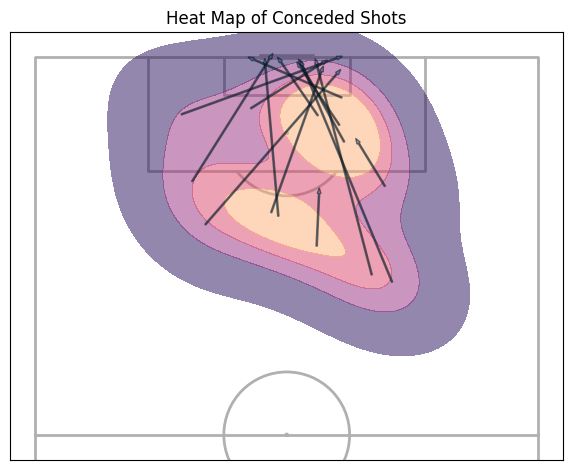

In [27]:
shots = opportunities[opportunities.get("Event").apply(lambda event: "Shot" in event)]
pitch = VerticalPitch(half=True, axis=True)
fig, ax = pitch.draw()
kde = sns.kdeplot(y=120-shots.get("startX"),x=80-shots.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 5,cmap = "magma")
for i in range(shots.shape[0]):
    row = shots.iloc[i]
    if row.get("Event") == "Tackle" and row.get("End Pos") == "[-1, -1]":
        plt.plot(row.get("startX"),row.get("startY"))
        continue
    plt.arrow(80-row.get("startY"),120-row.get("startX"),-1*(row.get("endY")-row.get("startY")),-1*(row.get("endX")-row.get("startX")),width = .2,alpha = .5)
plt.title("Heat Map of Conceded Shots")
shots.shape[0]

In [28]:
#shot assists
shotAssists = []
for i in range(1, opportunities.shape[0]):
    previous = opportunities.iloc[i-1]
    row = opportunities.iloc[i]
    if "Shot" in row.get("Event"):
        shotAssists.append([previous.get("numOpportunity"),previous.get("Game"),previous.get("Team"),previous.get("Event"),previous.get("Result"),previous.get("startX"),previous.get("startY"),previous.get("endX"),previous.get("endY"),row.get("Result")])
shotAssists = pd.DataFrame(shotAssists,columns=["numOpportunity","Game","Team","Event","Event Result","startX","startY","endX",'endY',"Shot result"])
shotAssists

,numOpportunity,Game,Team,Event,Event Result,startX,startY,endX,endY,Shot result
0,0.0,Navy,Navy,Tackle,Successful,28.666667,46.285714,9.428571,56.000000,Unsuccessful
1,1.0,Navy,Navy,Pass,Successful,23.142857,59.428571,19.714286,68.380952,Unsuccessful
2,2.0,Navy,Navy,Set Piece,Successful,31.142857,69.333333,8.857143,35.238095,Unsuccessful
3,3.0,Navy,Navy,Pass,Successful,10.952381,65.904762,25.428571,41.714286,Unsuccessful
4,4.0,Navy,Navy,Pass,Successful,27.333333,44.571429,24.857143,52.952381,Unsuccessful
5,5.0,Navy,Navy,Pass,Successful,40.285714,21.904762,30.000000,32.190476,Unsuccessful
6,6.0,Navy,Navy,Tackle,Successful,38.380952,19.428571,-1.000000,-1.000000,Unsuccessful
7,7.0,Navy,Navy,Pass,Successful,37.619048,49.142857,33.809524,26.857143,Unsuccessful
8,8.0,Navy,Navy,Pass,Successful,24.666667,37.523810,14.571429,26.857143,Unsuccessful
9,9.0,Navy,Navy,Pass,Successful,33.428571,72.952381,37.047619,60.000000,Unsuccessful


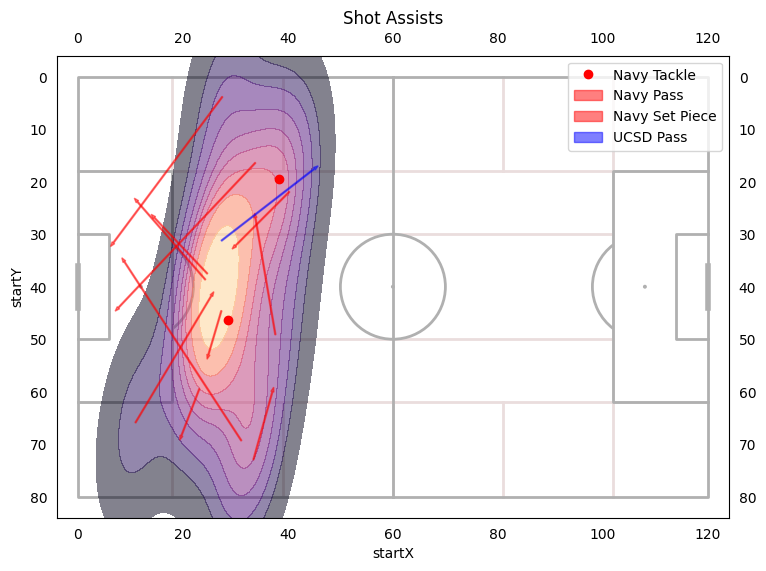

In [29]:
pitch = Pitch(positional=True, axis=True,label=True)
fig, ax = plt.subplots(figsize = (10,6))
pitch.draw(ax=ax)
kde = sns.kdeplot(x=shotAssists.get("startX"),y=shotAssists.get("startY"),fill = True,shade_lowest = False,alpha = .5,n_levels = 10,cmap = "magma")
for i in range(shotAssists.shape[0]):
    row = shotAssists.iloc[i]
    team = row.get("Team")
    if team == "UCSD":
            color = "blue"
    else:
            color = "red"
    if row.get("Event") == "Tackle" or row.get("Event")=="1st Ball":
        if row.get("Event")=="Tackle":
             shape = 'o'
        else:
             shape = 'v'
        if team == "UCSD":
            color = "b"
        else:
            color = "r"
        plt.plot(row.get("startX"),row.get("startY"),shape+color,label = team+" "+row.get("Event"))
        continue
    plt.arrow(row.get("startX"),row.get("startY"),row.get("endX")-row.get("startX"),row.get("endY")-row.get("startY"),width = .2,alpha = .5,color = color, label = team+" "+row.get("Event"))
handles, labels = plt.gca().get_legend_handles_labels()
unique_labels = dict(zip(labels, handles))

plt.legend(unique_labels.values(), unique_labels.keys())
plt.title("Shot Assists")
plt.show()

ValueError: 'label' must be of length 'x'

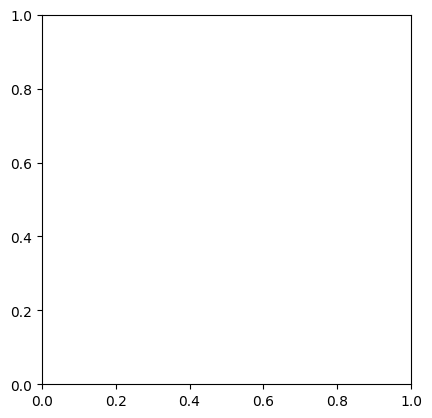

In [30]:
counts = shotAssists.groupby(["Event","Team"]).count()
plt.pie(counts.get("Game"),labels=["Lipscomb Pass","UCSD Tackle","Lipscomb Tackle"],autopct='%1.1f%%')
plt.title("Shot Assists")